1.Divide the features based on independent and dependent.
2.Train Test Split of the Dataset.
3.Standardize the dataset.
4.Train the model using linear regression

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/height-weight.csv')

In [ ]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

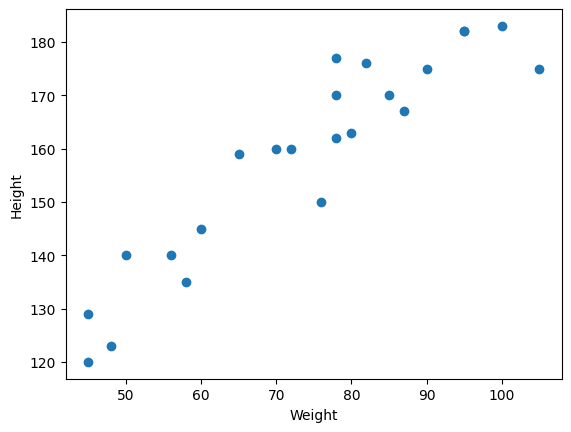

In [ ]:
##scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [ ]:
## Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


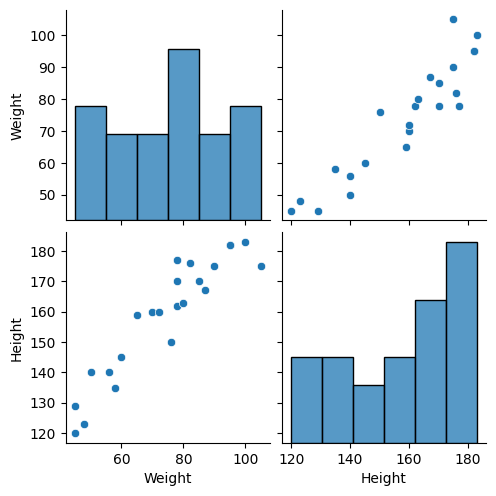

In [ ]:
## Seaborn for visualization
import seaborn as sns
sns.pairplot(df)

In [ ]:
## Independent and dependent features(dividing our dataset)
X=df[['Weight']] ### independent features should be data frame or 2 dimesnionalarray
y=df['Height'] ## this variiable can be in series or 1d array

In [ ]:
## Train Test Split
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42) ##-------->x_train is independent dataset for training our model while y_train is dependent dataset for again training our model.

In [ ]:
X.shape

(23, 1)

In [ ]:
X_train.shape,X_test.shape

((18, 1), (5, 1))

In [ ]:
## Standardization --- standardize the dataset Train independent feature
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [ ]:
X_test=scaler.transform(X_test)

In [ ]:
X_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

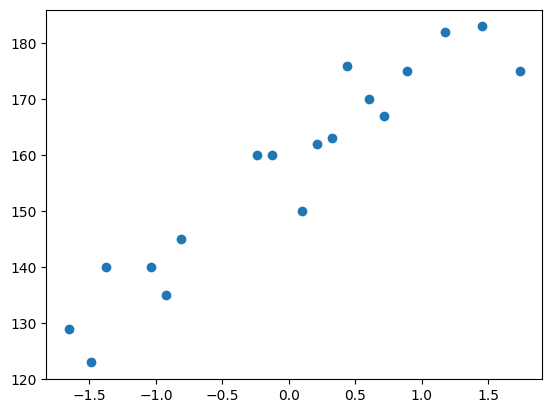

In [ ]:
plt.scatter(X_train,y_train)

In [ ]:
## Apply Simple Linear Regression to train the model
from sklearn.linear_model import LinearRegression

In [ ]:
regression=LinearRegression(n_jobs=-1)

In [ ]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [ ]:
print("Coefficient or slope:",regression.coef_)       ## slope of all the independent features can be calculated, slope is theta 1 and coeffiecient is theta 0.so for every value of x we will be getting our best fit line.
print("Intercept:",regression.intercept_)

Coefficient or slope: [17.03440872]
Intercept: 157.5


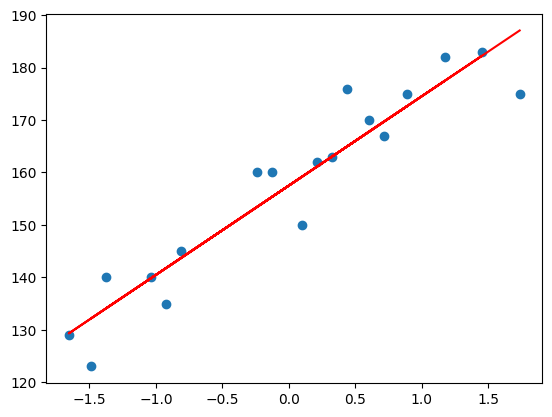

In [ ]:
## plot Training data plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),color='red')


Prediction for train data and similarly for test data

1.predicted height output = intercept+coef_(Weights)

2.y_pred_test= 157.5+17.03(X_test)

In [ ]:
y_pred_test=regression.predict(X_test)

In [ ]:
y_pred_test,y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

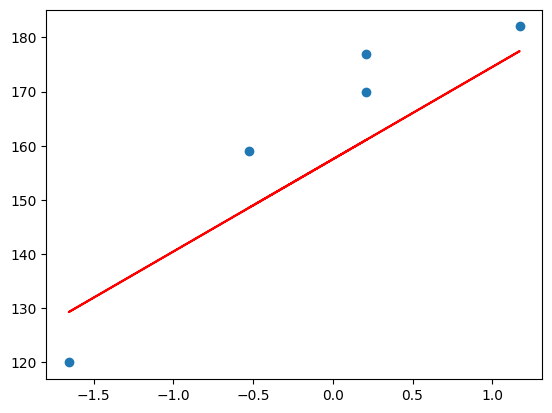

In [ ]:
plt.scatter(X_test,y_test)                              ##test is used to test how good the model is.
plt.plot(X_test,regression.predict(X_test),color='red')

## Performance Metrics

MSE,MAE,RMSE

R Square, Adjusted R Square

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test,y_pred_test)           ## y_pred_test is what our model has predicted while y_test is the actual value and we r trying to compare and find the accuracy with help of mse.
mae = mean_absolute_error(y_test,y_pred_test)          ## now the less the value of this error is the better our model is.
rmse = np.sqrt(mse)

In [ ]:
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)
print(score)          ## that is we r getting 77.6% accuracy.

0.776986986042344


## R square
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)
print(score)                                        ## R square value will always be greater than adjusted r square.

0.776986986042344


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model

n: The number of observations

k: The number of predictor variables

In [ ]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [ ]:
regression

LinearRegression(n_jobs=-1)

In [ ]:
## new datapoint lets say is 80.
scaled_weight=scaler.transform([[80]])
scaled_weight

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [ ]:
scaled_weight[0]

array([0.32350772])

In [ ]:
#Prediction of height
print("The value of height for 80 kg weight is ",regression.predict(scaled_weight)[0])

The value of height for 80 kg weight is  163.01076265919562


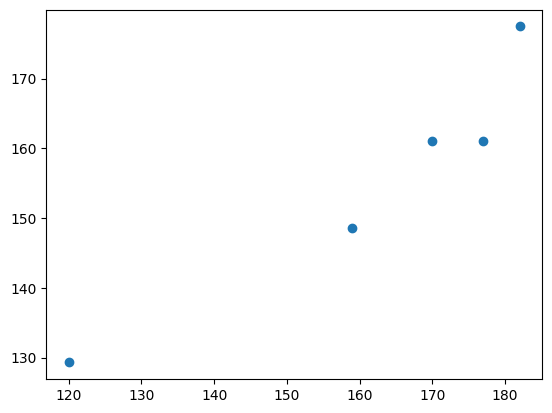

In [ ]:
##Assumptions
## plot a scatter plot for prediction
plt.scatter(y_test,y_pred_test)                ## its is linear and hence indicating that we have done a very good prediction.

In [ ]:
## Residuals
residuals=y_test-y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

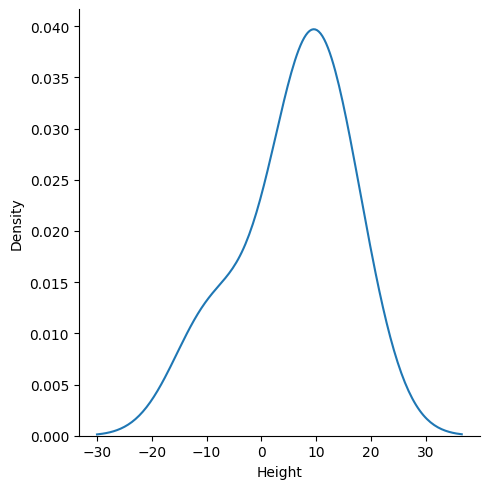

In [ ]:
## PLot this residuals
import seaborn as sns
sns.displot(residuals,kind='kde')

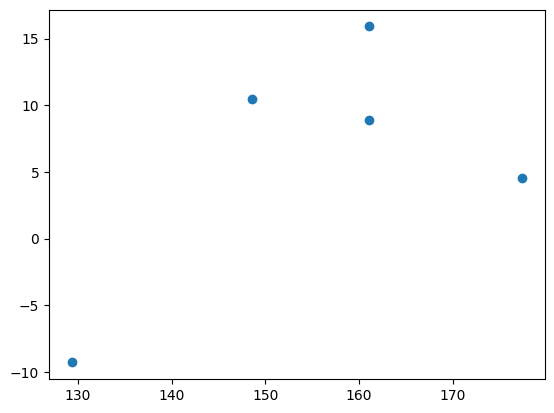

In [ ]:
plt.scatter(y_pred_test,residuals)  ##unifrom distribution